# Introduction to Quant Finance

## Module 1.6: Time Series 

### 1.6.4 ARMA

We have seen two models for time series analysis - Moving Average processes, and Autoregressive processes.

The autoregressive model for predicting the value of a variable in a time series. We use the annotation $AR(n)$ for an autoregressive model with $n$ periods.

$AR(n) X_t = c + \sum_{i=0}^n{\beta_i X_{t-n+1}} + u_t$

We can simplify in the case of an AR(1) model, that is $n=1$. This simplifies further if we also assume a zero mean (which can be done by demeaning the data beforehand) and an error term that is white noise:

$AR(1) = \beta X_{t-1}$


An MA model is given as:

$MA(p) X_t = \mu + \epsilon_{t} + \sum_{i=1}^{p}\theta_i\epsilon_{t-i}$

and specifically the MA(1) process as:

$MA(1)X_t = \epsilon_t + \theta \epsilon_{t-1}$


The difference here is subtle, but critically important. For a MA model, the correlation is 0 when the time periods are different by more than 1. That is, when some effect happens that changes the value of $X_t$ (say, a sudden high impact event), it only affects the price for two time periods. After that, we are back to "business as usual". For an AR model, $X_t$ depends on $X_{t-1}$. This in turn depends on $X_{t-2}$, and so on. So that shock has an almost permanent (although significantly deminishing) effect on the value of $X_t$.

The main difference is that MA depends on the lagged error, which is iid, while the AR model depends on the lagged value, which is not.

As you might have guessed, ARMA is a combination of both models, and combines the predictive power of both.

An $ARMA(p, q)$ model, where $p$ is the lag in the autoregressive model and $p$ is the lag in the moving-average modelis given as:

$X_t = c + \epsilon_t + \sum_{i=1}^{q}{\beta X_{t-i}} + \sum_{i=1}^{p}\theta_i\epsilon_{t-i}$

(where $c$ is the bias, and would be 0 if the data was demeaned beforehand)

As a general rule, one would choose the lowest $p$ and $q$ values that adequately describe the data, generally also over larger values that have better predictive power.

To fit an ARMA model, once $p$ and $q$ have been chosen, a least squares regression will normally work, which will minimise the error term.

To choose $p$ and $q$ themselves, there are several methods. A subjective model is to use a autocorrelation function to choose a value for $p$:

In [1]:
%run setup.ipy

In [20]:
import quandl

In [21]:
from statsmodels import api as sms

In [53]:
employment = quandl.get("FRED/NROUST").diff().dropna()

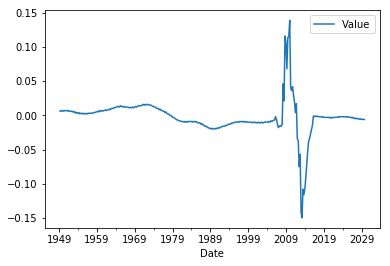

In [54]:
employment.plot()

In [55]:
pac = sms.tsa.pacf(employment)

/home/rob/anaconda3/envs/quant/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


In [56]:
from statsmodels.graphics.tsaplots import plot_pacf

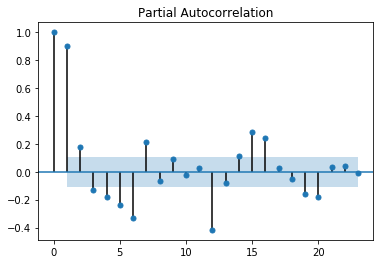

In [57]:
plot_pacf(employment, lags=np.arange(24));

A good value here might be 1 - i.e. employment moves as it did the previous month. Another good option is 12, indicating that year-on-year changes in employment are regular (which makes sense for seasonal staff).

A subjective method for choosing $q$, the lag in the MA model, is to use the full correlation function:

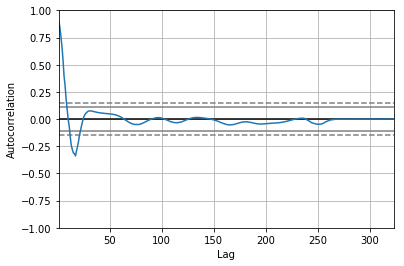

In [60]:
pd.plotting.autocorrelation_plot(employment)

In [71]:
ac = sms.tsa.acf(employment,nlags=24)

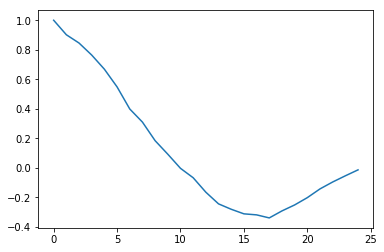

In [72]:
plt.plot(ac)

Here, perhaps a lower value is more indicative.

A more objective method is to try many different values ofr $p$ and $q$ and select the most informative, that is, the one the explains the data best. The `statsmodels` package has a useful function for this:

In [73]:
from statsmodels.tsa import stattools

In [81]:
employment.index.freq = "QS-OCT"  # Define our frequency as "quarters from October, start of month"

In [84]:
statistics = stattools.arma_order_select_ic(employment)  # May take a few minutes

In [85]:
statistics['bic']

,0,1,2
0,-1425.572126,-1671.849901,-1805.260817
1,-1960.391602,-1961.924479,-1965.757912
2,-1964.580178,-1960.742190,-2003.768340
3,-1963.836622,-1983.750752,-2024.629486
4,-1967.600391,-1983.436176,-1988.273046


### Exercise

Review the documentation for this function and identify:

1. What does 'bic' stand for?
2. What other options can be selected?
3. What the columns are (i.e. $p$ or $q$)?
4. What the index is for?
5. Which value should we select? Are higher or lower values better?
6. Find a shortcut parameter that gives us this value without the need to compute it?


### Extended Exercise

Once you have your parameters, fit an ARMA model using them, and review the results.

In [92]:
# Solution (partial)
from statsmodels import api as sms
model = sms.tsa.ARMA(employment, order=(3, 2))

In [90]:
results = model.fit()

In [91]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Value   No. Observations:                  323
Model:                     ARMA(3, 2)   Log Likelihood                1032.537
Method:                       css-mle   S.D. of innovations              0.010
Date:                Sat, 09 Mar 2019   AIC                          -2051.073
Time:                        16:16:51   BIC                          -2024.629
Sample:                    04-01-1949   HQIC                         -2040.517
                         - 10-01-2029                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0024      0.005     -0.455      0.649      -0.013       0.008
ar.L1.Value     1.8295      0.066     27.897      0.000       1.701       1.958
ar.L2.Value    -1.2166      0.109    -11.201      0.000      -1.429      -1.004
ar.L3.Value     0.3207      0.061      5.297      0.000       0.202       0.439
ma.L1.Value    -1.2591      0.032    -39.824      0.000      -1.321      -1.197
ma.L2.Value     0.9061      0.025     36.253      0.000       0.857       0.955
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2078           -0.0000j            1.2078           -0.0000
AR.2            1.2929           -0.9540j            1.6068           -0.1012
AR.3            1.2929           +0.9540j            1.6068            0.1012
MA.1            0.6948           -0.7880j            1.0505           -0.1350
MA.2            0.6948           +0.7880j            1.0505            0.1350
-----------------------------------------------------------------------------
"""